In [1]:
#from midir import w1w2_condition
from tqdm import tqdm
import matplotlib
import os
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits

import astropy
from astropy.table import Table
from astropy.time import Time
from astropy.timeseries import TimeSeries, aggregate_downsample
from astropy.coordinates import match_coordinates_sky as coords
from astropy.coordinates import SkyCoord
import astropy.units as u
import kcorrect.response
from matplotlib.ticker import FormatStrFormatter

import astropy.cosmology.units as cu
from astropy.cosmology import FlatLambdaCDM, WMAP9


from fileIO_processing import *

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 22})
matplotlib.rc('font',**{'family':'serif','serif':['Times']})
matplotlib.rc('text', usetex=True)

SAVE_FILEPATH = 'C:/Users/paiaa/Documents/Research/Blanton Lab/Midir Variables/Figures/'
IMPORT_FILEPATH ='C:/Users/paiaa/Documents/Research/Blanton Lab/Midir Variables/'

In [2]:
mnsa_hdu, manga_wise_hdu, pipe3d_hdu = import_manga(6, 1, 1)
mnsa, mwv, pipe3d = mnsa_hdu.data, manga_wise_hdu.data, pipe3d_hdu.data

crts, asassn, ztf, ptf = import_lightcurves('CRTS_midir_var_highest_AGN_Lbol.csv', '8553-1901.csv', 'ZTF_8553_1901.csv', 'PTF_midir_variables.csv')

In [3]:
print(mwv[mwv['plateifu']=='9870-1902']['ra'][0], mwv[mwv['plateifu']=='9870-1902']['dec'][0])

233.165105061 44.5341852818


In [4]:
crts_p = process_crts(crts, clip=3)
asassn_p = process_asassn(asassn, filter='V', clip=3)
ztf_p = process_ztf(ztf, filter='zg', clip=3)
ptf_p = process_ptf(ptf[ptf['plateifu_01']=='8553-1901'], filter=2, clip=2)

processed_data = [crts_p, asassn_p, ztf_p, ptf_p]
surveys = []
names = ['CRTS', 'ASAS-SN', 'ZTF', 'PTF']

In [10]:
ztf

time,oid,expid,hjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
Time,str15,int32,float64,float64,float64,int32,str2,float64,float64,float64,float64,str14,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,int32
58203.3690046,794115100006330,44936900,2458203.871002268,15.0284777,0.0118834544,0,zg,233.9683401,57.90265,0.763999999,0.0340000018,20180326368993,794,15,1,20.9200001,26.2768021,0.0324197859,-0.0817573816,2.37184722e-05,30.0,1.19099998,2
58203.4051157,794115100006330,44940511,2458203.907113495,15.0031643,0.0118768876,0,zg,233.9683502,57.9026701,0.69599998,0.0930000022,20180326405069,794,15,1,21.2299995,26.2885647,0.0278941914,-0.0549791902,1.57862414e-05,30.0,1.12,2
58203.4108449,794115100006330,44941084,2458203.912842715,15.0041838,0.0118771372,0,zg,233.9683699,57.9026602,0.765999973,0.0659999996,20180326410833,794,15,1,21.3199997,26.288538,0.0289846435,-0.0470764861,1.76364902e-05,30.0,1.11199999,1
58204.3777778,794115100006330,45037777,2458204.87977848,15.028429,0.0118834414,0,zg,233.968359,57.9026543,0.217999995,-0.0060000001,20180327377766,794,15,1,20.4599991,26.3118763,0.0352429226,-0.0896130428,3.31002666e-05,30.0,1.16400003,2
58204.4167708,794115100006330,45041677,2458204.918771596,15.0311785,0.0118842004,0,zg,233.9683607,57.902653,0.301999986,0.0049999999,20180327416690,794,15,1,20.7099991,26.3198147,0.0364339761,-0.080594644,3.12081247e-05,30.0,1.10099995,2
58204.4176852,794115100006330,45041768,2458204.919685998,15.0108643,0.0118788071,0,zg,233.9683732,57.9026565,0.493999988,-0.001,20180327417674,794,15,1,20.6399994,26.3154087,0.0332759432,-0.0779020712,2.79297983e-05,30.0,1.10000002,2
58204.4616551,794115100006330,45046165,2458204.963656021,15.0340118,0.0118849892,0,zg,233.9683736,57.9026342,1.164999962,0.0099999998,20180327461644,794,15,1,20.8999996,26.3136406,0.0349948257,-0.0619847253,2.6709653e-05,30.0,1.074,2
58204.4988079,794115100006330,45049880,2458205.000808915,14.9644976,0.0118682627,0,zg,233.9683911,57.9026573,0.94599998,-0.0,20180327498762,794,15,1,20.6299992,26.2948875,0.0416176915,-0.059178941,4.19752105e-05,30.0,1.08599997,2
58205.384838,794115100006330,45138483,2458205.886841136,15.0324631,0.0118845562,0,zg,233.9683737,57.9026587,0.38499999,0.001,20180328384826,794,15,1,19.6599998,25.995451,0.0413526185,-0.0664254203,7.57904272e-05,30.0,1.14499998,2


Text(0.5, 0, 'date')

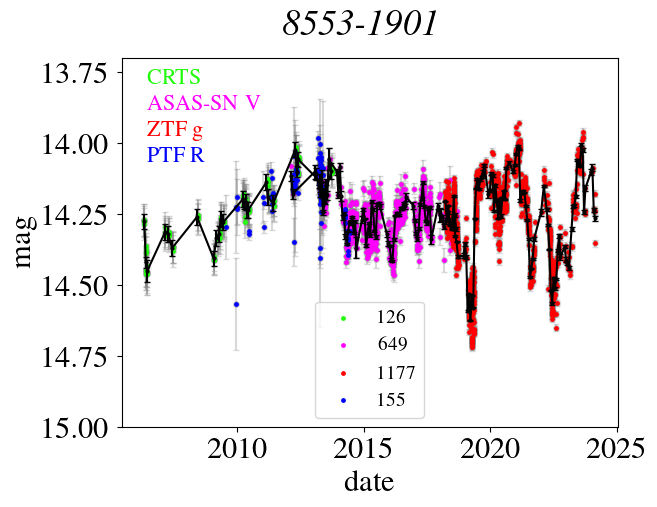

In [8]:
fig, ax = plt.subplots()
colors = ['#21fc0d', 'fuchsia', 'red', 'blue']

for i, data in enumerate(processed_data):

    if i == 3:
        a, b, c, d, e, f = generate_binned_lc( ts=data, freq=40, epochs=100)
    else:
        a, b, c, d, e, f = generate_binned_lc(ts=data, freq=20, epochs=150)


    if i == 1:
        ax.errorbar(a, b-0.3, yerr=c, ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
        ax.scatter(a, b-0.3, s=6, c=colors[i], zorder=2, label=str(len(b)))
        ax.errorbar(d[~e.mask], e[~e.mask]-0.3, yerr=f[~e.mask], capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'k', marker = 'o', mfc = 'k', markersize = 2, markevery = 1, alpha=1, zorder=3)

    elif i == 2:
        ax.errorbar(a, b-0.83, yerr=c, ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
        ax.scatter(a, b-0.83, s=6, c=colors[i], zorder=2, label=str(len(b)))
        ax.errorbar(d[~e.mask], e[~e.mask]-0.83, yerr=f[~e.mask], capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'k', marker = 'o', mfc = 'k', markersize = 2, markevery = 1, alpha=1, zorder=3)
    elif i == 0:
        ax.errorbar(a, b, yerr=c, ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
        ax.scatter(a, b, s=6, c=colors[i], zorder=2, label=str(len(b)))
        ax.errorbar(d[~e.mask], e[~e.mask], yerr=f[~e.mask], capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'k', marker = 'o', mfc = 'k', markersize = 2, markevery = 1, alpha=1, zorder=3)
    else:
        ax.errorbar(a, b, yerr=c, ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
        ax.scatter(a, b, s=6, c=colors[i], zorder=2, label=str(len(b)))


ax.text(0.05, 0.97,  names[0], ha='left', va='top', c=colors[0], fontsize=16, transform=ax.transAxes, zorder=5)
ax.text(0.05, 0.9,  names[1] + ' V', ha='left', va='top', c=colors[1], fontsize=16, transform=ax.transAxes, zorder=5)
ax.text(0.05, 0.83,  names[2] + ' g', ha='left', va='top', c=colors[2], fontsize=16, transform=ax.transAxes, zorder=5)
ax.text(0.05, 0.76,  names[3] + ' R', ha='left', va='top', c=colors[3], fontsize=16, transform=ax.transAxes, zorder=5)

ax.set_ylim(13.7, 15)
#ax.set_xlim(2017, 2020)
ax.invert_yaxis()    

fig.suptitle(r'\textit{8553-1901}')
ax.legend(fontsize=14)
ax.set_ylabel('mag')    
ax.set_xlabel('date')

#plt.savefig(SAVE_FILEPATH+'8553-1901_matched_optical_lc.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)


In [9]:
time, mag, mag_err = np.array([]), np.array([]), np.array([])

for data in processed_data[:]:
    time = np.append(time, data['time'].to_value('decimalyear'))

mag = np.append(mag, crts_p['mag'])
mag = np.append(mag, asassn_p['mag']-0.3)
mag = np.append(mag, ztf_p['mag']-0.83)
mag = np.append(mag, ptf_p['mag'])

mag_err = np.append(mag_err, crts_p['mag_err'])
mag_err = np.append(mag_err, asassn_p['mag_err'])
mag_err = np.append(mag_err, ztf_p['mag_err'])
mag_err = np.append(mag_err, ptf_p['mag_err'])

In [10]:
combined_lc = TimeSeries()

combined_lc['time'] = Time(time, format='decimalyear')
combined_lc['mag'] = mag
combined_lc['mag_err'] = mag_err

combined_lc.sort('time')

a, b, c, d = bin_data(combined_lc, freq=20, bins=400)

b['mag_err'] = b['mag_err']/np.sqrt(a['mag_err'])


Text(0.5, 0.98, '\\textit{8553-1901}')

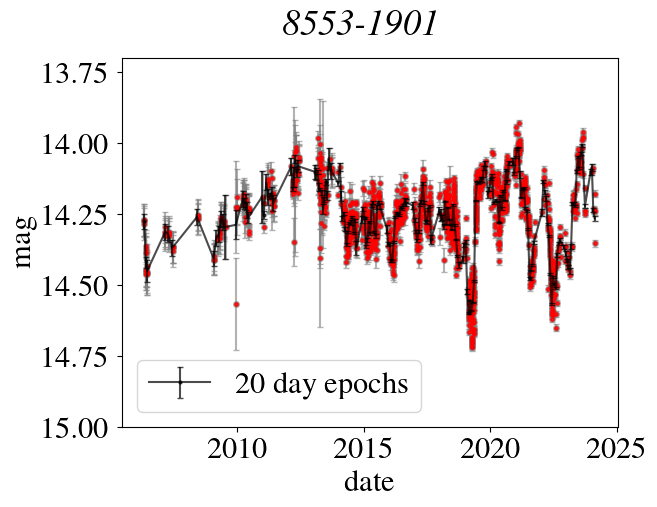

In [11]:
fig, ax = plt.subplots()

ax.errorbar(time, mag, yerr=mag_err, ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.6, zorder=-1)
ax.scatter(time, mag, c='r', s=6, alpha=0.8)
ax.errorbar(b['time_bin_start'][~b['mag'].mask].value, b['mag'][~b['mag'].mask], yerr=b['mag_err'][~b['mag'].mask], capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'k', marker = 'o', mfc = 'k', markersize = 2, markevery = 20, alpha=0.7, zorder=3, label='20 day epochs')

ax.set_ylim(13.7, 15)
ax.invert_yaxis()

ax.legend()
ax.set_ylabel('mag')
ax.set_xlabel('date')
fig.suptitle(r'\textit{8553-1901}')
#plt.savefig(SAVE_FILEPATH+'8553-1901_matched_optical_lc_combined.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)

In [12]:
w2time = Time(mwv[mwv['plateifu']=='8553-1901']['mjd'], format='mjd').to_value('decimalyear')
w2mag = mwv[mwv['plateifu']=='8553-1901']['mean_W2_per_epoch']
w2mag_err = mwv[mwv['plateifu']=='8553-1901']['err_W2_per_epoch']

w2time, w2mag, w2mag_err = w2time[np.isfinite(w2mag)], w2mag[np.isfinite(w2mag)], w2mag_err[np.isfinite(w2mag)]

Text(0.5, 0.98, '\\textit{8553-1901}')

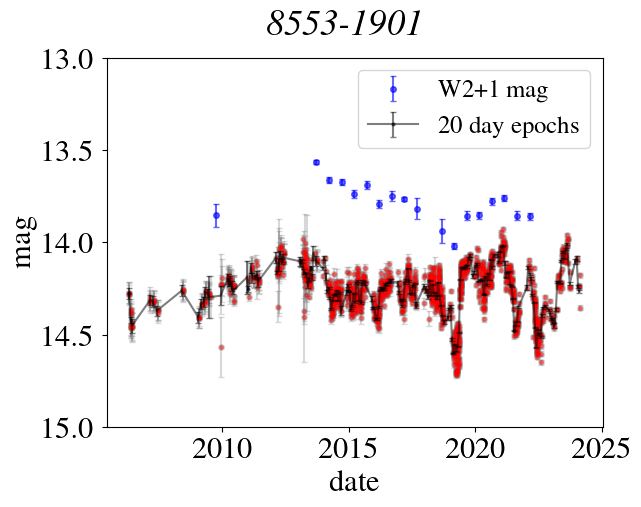

In [13]:
fig, ax = plt.subplots()

ax.errorbar(w2time-0.25, w2mag+1, yerr=w2mag_err, ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'b', marker = 'o', mfc = 'b', markersize = 4, markevery = 1, alpha=0.6, zorder=4, label='W2+1 mag')
#ax.plot(w2time, w2mag+1, c='b', alpha=0.8, zorder=3, marker='o', markersize=3)

ax.errorbar(time, mag, yerr=mag_err, ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
ax.scatter(time, mag, c='r', s=6, alpha=0.4)
ax.errorbar(b['time_bin_start'][~b['mag'].mask].value, b['mag'][~b['mag'].mask], yerr=b['mag_err'][~b['mag'].mask], capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'k', marker = 'o', mfc = 'k', markersize = 2, markevery = 20, alpha=0.5, zorder=3, label='20 day epochs')

ax.set_ylim(13, 15)
ax.invert_yaxis()

ax.legend(fontsize=18)
ax.set_ylabel('mag')
ax.set_xlabel('date')
fig.suptitle(r'\textit{8553-1901}')

Optimization restart 1/10, f = -1868.0277459354356
Optimization restart 2/10, f = -1868.0277459077915
Optimization restart 3/10, f = 2790.4015851923705
Optimization restart 4/10, f = -1868.0277459396634
Optimization restart 5/10, f = -1868.0277458865776
Optimization restart 6/10, f = -1868.0277457732673
Optimization restart 7/10, f = -1868.0277458984606
Optimization restart 8/10, f = -1868.0277459180707
Optimization restart 9/10, f = -1868.0277459459053
Optimization restart 10/10, f = 3124.1812412241743


{'dataplot': [<matplotlib.collections.PathCollection at 0x28ab2908410>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x28a9f727980>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x28ab2ea7380>]}

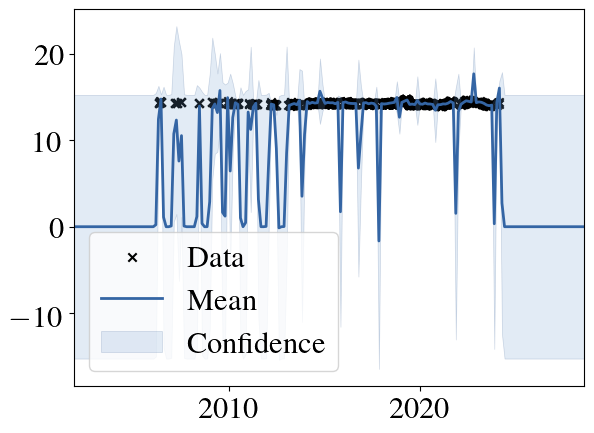

In [28]:
import GPy


x_train = time.reshape(-1, 1)
y_train =  mag.reshape(-1, 1)
y_err =  mag_err

rbf = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
gpr = GPy.models.GPRegression(x_train, y_train, rbf)

gpr.Gaussian_noise.variance = np.mean(y_err)**2
gpr.Gaussian_noise.variance.fix()
# scaler = preprocessing.StandardScaler().fit(x_train.reshape(-1,1))
# x_scaled = scaler.transform(x_train.reshape(-1,1))
gpr.optimize_restarts(num_restarts = 10)
gpr.optimize()
# Obtain optimized kernel parameters
l = gpr.rbf.lengthscale.values[0]
sigma_f = np.sqrt(gpr.rbf.variance.values[0])

# Compare with previous results
#assert(np.isclose(l_opt, l))
#assert(np.isclose(sigma_f_opt, sigma_f))

# Plot the results with the built-in plot function
gpr.plot()

In [30]:
l

0.054644598226519736

(15.0, 13.75)

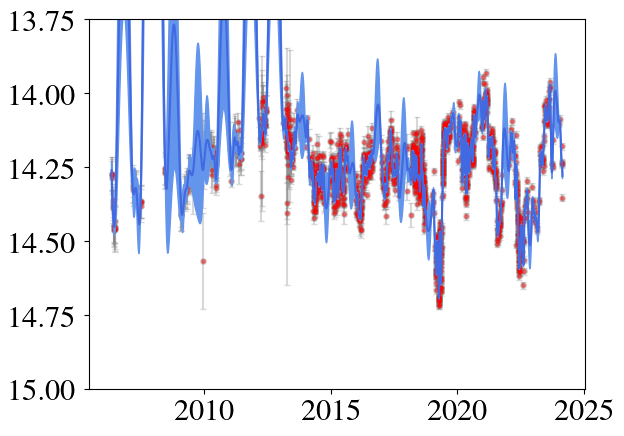

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(time, mag, yerr=mag_err, ls='none', capsize = 2, elinewidth = 1.5,  linewidth = 1.5, 
                color = 'grey', marker = 'o', mfc = 'grey', markersize = 4, markevery = 1, alpha=0.3, zorder=-1)
ax.scatter(time, mag, c='r', s=6, alpha=0.4)

ax.plot(x, mean_pred, color='royalblue')
ax.fill_between(x, mean_pred-std_pred, mean_pred+std_pred, color='cornflowerblue')

ax.set_ylim(15, 13.75)